# Splitting measures

With more than one attribute taking part in the decision-making process, it is necessary to decide the relevance and importance of each of the attributes present in a dataset. Thus, we want to place the most relevant feature at the root node and further traverse down by splitting the nodes.

As we move further down the tree, the level of impurity or uncertainty decreases, thus leading to a better classification or best split at every node. Splitting measures such as Information gain, Gini Index, etc. are used to decide the same.

## 1. Gini Impurity: it measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen.
$G(\mathcal{S}) = 1-\sum_{i \in \mathcal {C}}p_{i}^2$, \
where \
$\mathcal {C}$ is set of classes in dataset $\mathcal{S}$ and \
$p_{i}$ is the proportion of class $i$ in $\mathcal{S}$

## 2. Entropy: It is a measure of the amount of uncertainty in the (data) set $\mathcal{S}$ 
$H(\mathcal{S})=-\sum_{i\in \mathcal {C}}p_{i}\log_{2}(p_{i})$,  \
where \
$\mathcal {C}$ is set of classes in dataset $\mathcal{S}$ and \
$p_{i}$ is the proportion of class $i$ in $\mathcal{S}$

## 3. Information Gain on an attribute $\mathcal{A}$ of $\mathcal{S}$ is the measure of the difference in entropy from before to after the set $\mathcal{S}$ is split on the attribute $\mathcal{A}$ into subsets $\mathcal{S_{1}}$, $\mathcal{S_{2}}$,$...$, $\mathcal{S_{m}}$
$IG(\mathcal{S},\mathcal{A})=H(\mathcal{S})-\sum_{j=1}^{m}H(\mathcal{S}|\mathcal{S}_{j})$, where $H(\mathcal{S}|\mathcal{S}_{j})=\frac{\mid\mathcal{S}_{j}\mid}{\mid \mathcal{S} \mid}.H(\mathcal{S}_{j})$

# ID3 Algorithm - 
ID3 stands for Iterative Dichotomiser 3 and is named such because the algorithm iteratively (repeatedly) dichotomizes(divides) features into two or more groups at each step.

Invented by Ross Quinlan, ID3 uses a top-down greedy approach to build a decision tree. In simple words, the top-down approach means that we start building the tree from the top and the greedy approach means that at each iteration we select the best feature at the present moment to create a node.

Most generally ID3 is only used for classification problems with nominal features only.

Steps:\
$***$\
$1.$ Calculate the Information Gain of each feature.\
$2.$ Considering that all rows don’t belong to the same class, split the dataset $S$ into subsets using the feature for which the Information Gain is maximum.\
$3.$ Make a decision tree node using the feature with the maximum Information gain.\
$4.$ If all rows belong to the same class, make the current node as a leaf node with the class as its label.\
$5.$ Repeat for the remaining features until we run out of all features, or the decision tree has all leaf nodes.

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris(as_frame=True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

In [3]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=79)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=79)

In [4]:
from sklearn.tree import export_graphviz
from graphviz import Source

In [5]:
export_graphviz(tree_clf, 
                out_file="iris_tree.dot", 
                feature_names=["petal length (cm)", "petal width (cm)"],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

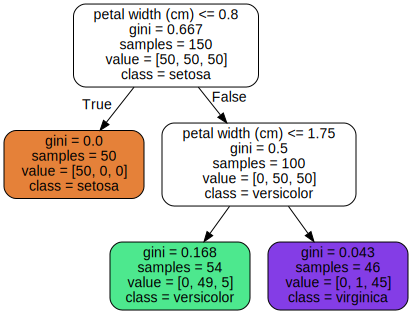

In [6]:
Source.from_file("iris_tree.dot")

Scikit-Learn uses *Classification and Regression Tree (CART)* algorith to train decision trees.The algorith works by first splitting the training set into two subsets using a single feature $k$ and a threshold $t_{k}$ (e.g. "petal width (cm)" $\le 0.8$).

It searches for the pair $(k,t_{k})$ that produces the purest subsets, weighted by their size.

CART cost function for minimization:

$J(k,t_{k})=\frac{m_{left}}{m}G_{left}+\frac{m_{right}}{m}G_{right}$, 

where \
$G_{left/right}$ measures the impurity of left/right subset, and \
$m_{left/right}$ is the cardinality of left/right subset.

In [7]:
# help(tree_clf.tree_)

In [8]:
tree_clf.predict_proba([[5.1, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [9]:
iris.target_names[tree_clf.predict([[5.1, 1.5]])]

array(['versicolor'], dtype='<U10')

In [10]:
import matplotlib.pyplot as plt
from inspection import plot_decision_boundary2D

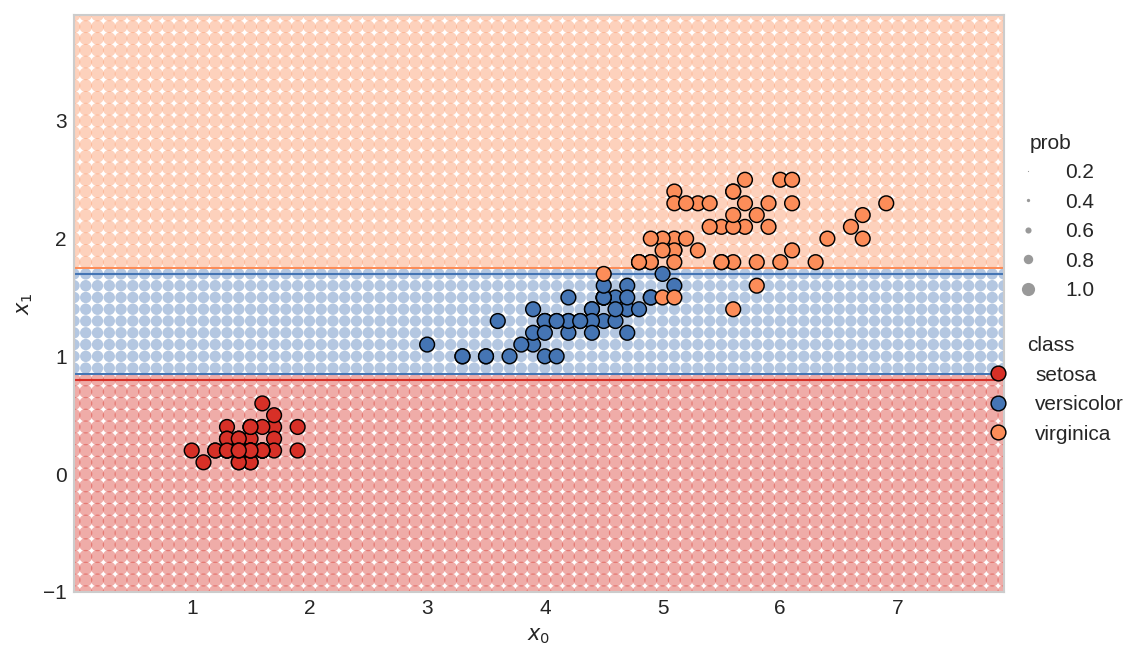

In [11]:
classes = list(iris.target_names)
plot_decision_boundary2D(tree_clf, X_iris, y_iris.copy(), classes,)

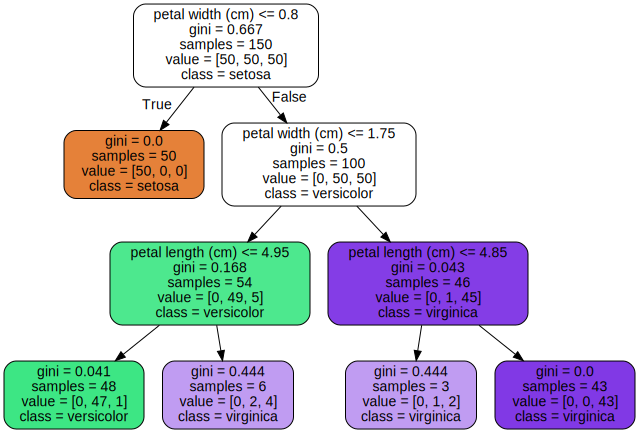

In [12]:
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=79)
tree_clf.fit(X_iris, y_iris)

export_graphviz(tree_clf, 
                out_file="iris_tree_3.dot", 
                feature_names=["petal length (cm)", "petal width (cm)"],
                class_names=iris.target_names,
                rounded=True,
                filled=True)

Source.from_file("iris_tree_3.dot")

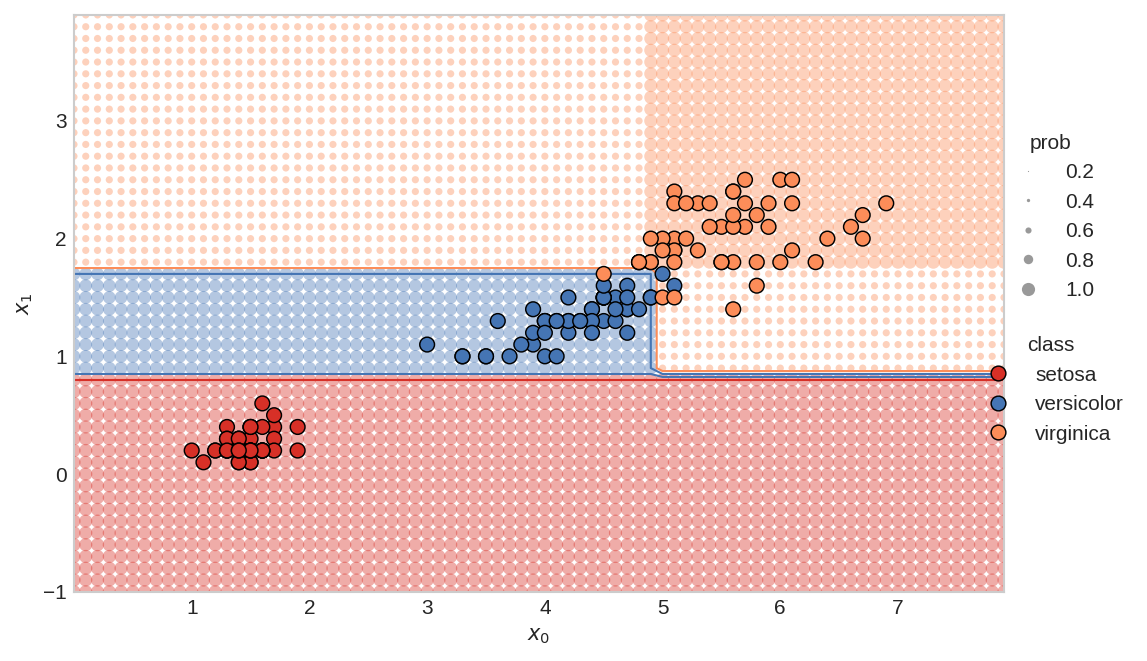

In [13]:
plot_decision_boundary2D(tree_clf, X_iris, y_iris.copy(), classes,)